## Aprendizagem Supervisionada

#### Conceito

 > Tipo de `aprendizagem de máquina` formado por algoritmos que simulam aprendizado com dados previamente rotulados. De modo iterativo, cada amostra é apresentada ao algoritmo e o mesmo gera como saída um possível rótulo para a amostra. O rótulo predito é comparado com o rótulo real e caso o algoritmo erre, um ajuste é feito para que a saída predita se aproxime ao máximo da saída real.


#### Rótulo:
- **Discreto:** Classificação
- **Contínuo:** Regressão

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/df1dafe9-7c7e-4dec-a8fe-13cff93ab684.png" width=400>

#### Ex.: Temperatura de um ambiente

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/788cdc1b-20df-407a-82f3-776de685628e.jpg" width="400">    

### Features - Características dos dados

 - Desempenho → Métrica 
 - Treinamento e teste → Experiência
     - **Features**: Características do objeto alvo da análise
     - **Target**: Classe ou valor do objeto

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/39eea9b9-6906-42e0-9ef1-e7aee4293aa3.jpg" width=700>

### Construção de um modelo de machine learning

**Passo 1**: Formulação de hipótese
 - Disponibilidade dos dados
 - Padrão nos dados
 - Oportunidade de negócio
 - Viabilidade do modelo
 - EDA
    

**Passo 02**: Construção do experimento
 - **Coleta de dados**
  - Técnicas de amostragem 
 - Pré-processamento dos dados
 - Definição de métricas
 - Seleção de modelo(s)
     - Modelo paramétrico ou não paramétrico?
     - Conjunto de parâmetros
     - Conjunto de hiperparâmetros
        

**Passo 03**: Construção do modelo
 - Escolha de ferramentas
 - Ambiente de execução
 - Forma de monitoramento do treinamento


**Passo 04**: Avaliação dos resultados
 - Teste
 - Comparativo
 - **Monitoramento**
     - Métricas de monitoramento
     - Drift

## Desenvolvimento de um modelo

#### 1. Classificação

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/37621853-e789-4ccd-aff2-4f3078556cfb.jpg" width=300>

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### Quantas features?

In [3]:
len(data.feature_names.tolist())

30

In [4]:
df_features = pd.DataFrame(data = data.data, columns = data.feature_names)
df_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df_target = pd.DataFrame(data = data.target, columns=['classe'])
df_target

,classe
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


#### Divisão de treino e teste

In [7]:
X = df_features
y = df_target['classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
print(f'Total:{X.shape[0]}, Treino:{X_train.shape[0]}, Teste:{X_test.shape[0]}')

Total:569, Treino:455, Teste:114


In [9]:
print(f'Total:{y.shape[0]}, Treino:{y_train.shape[0]}, Teste:{y_test.shape[0]}')

Total:569, Treino:455, Teste:114


In [10]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
83,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.146900,0.1634,0.07224,...,20.33,32.72,141.30,1298.0,0.1392,0.2817,0.24320,0.18410,0.2311,0.09203
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.033410,0.1776,0.06907,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080
267,13.590,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.021420,0.1635,0.05859,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.14530,0.06189,0.2446,0.07024
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.010430,0.1621,0.05952,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.07190,0.04866,0.2321,0.07211
139,11.280,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.047960,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.022600,0.1893,0.05886,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285
367,12.210,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.020270,0.1695,0.05916,...,14.29,24.04,93.85,624.6,0.1368,0.2170,0.24130,0.08829,0.3218,0.07470
442,13.780,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,0.1405,0.05848,...,15.27,17.50,97.90,706.6,0.1072,0.1071,0.03517,0.03312,0.1859,0.06810
85,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.087950,0.2132,0.06022,...,22.93,27.68,152.20,1603.0,0.1398,0.2089,0.31570,0.16420,0.3695,0.08579


#### Criar e treinar o modelo de regressão logística
Intuição

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/b92ec6a5-91b2-45f5-ad65-75978d6f54cc.png" width=400>

#### Construção do modelo

In [12]:
model = LogisticRegression()
model

LogisticRegression()

### Treinamento do modelo

In [13]:
model.fit(X_train, y_train)

C:\Users\ProDigital\anaconda3\envs\machine\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Testar o modelo

In [15]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468
35,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.38350,0.54090,0.18130,0.4863,0.08633
414,15.130,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
499,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.35970,0.51790,0.21130,0.2480,0.08999
165,14.970,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.01939,0.1515,0.05266,...,15.98,25.82,102.30,782.1,0.1045,0.09995,0.07750,0.05754,0.2646,0.06085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,13.850,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.1185,0.17240,0.14560,0.09993,0.2955,0.06912
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.1365,0.47060,0.50260,0.17320,0.2770,0.10630
375,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.25500,0.21140,0.12510,0.3153,0.08960
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773


In [14]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1])

#### Acurácia (Accuracy)

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/8aa5276a-ef3e-4529-aaec-d13944de905d.png" width=300>

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.956140350877193

 - VP = Verdadeiro Positivo
 - VN = Verdadeiro Negativo
 - FP = Falso Positivo
 - FN = Falso Negativo

In [17]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[34,  5],
       [ 0, 75]], dtype=int64)

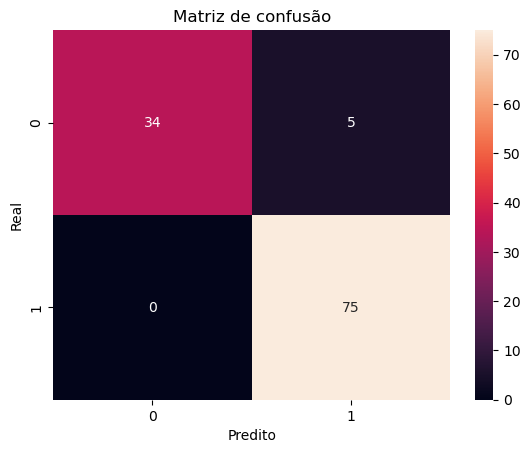

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(matrix, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()

### Probabilidades

In [26]:
y_test

110    1
35     0
414    0
499    0
165    1
      ..
279    1
283    0
375    1
21     1
240    1
Name: classe, Length: 114, dtype: int32

In [28]:
y_proba = model.predict_proba(X_test)
y_proba

array([[5.77762399e-03, 9.94222376e-01],
       [9.99013840e-01, 9.86160055e-04],
       [9.43658444e-01, 5.63415565e-02],
       [9.99999853e-01, 1.46616807e-07],
       [1.23209312e-02, 9.87679069e-01],
       [2.30360420e-01, 7.69639580e-01],
       [1.36499825e-03, 9.98635002e-01],
       [2.25026087e-01, 7.74973913e-01],
       [9.73388247e-01, 2.66117533e-02],
       [4.07581903e-03, 9.95924181e-01],
       [1.00000000e+00, 1.06466410e-19],
       [1.45924037e-03, 9.98540760e-01],
       [9.99999999e-01, 1.36903313e-09],
       [1.45947411e-01, 8.54052589e-01],
       [1.84111016e-01, 8.15888984e-01],
       [1.79076880e-03, 9.98209231e-01],
       [1.33976322e-01, 8.66023678e-01],
       [9.98501806e-01, 1.49819422e-03],
       [3.78914737e-02, 9.62108526e-01],
       [2.58988335e-03, 9.97410117e-01],
       [9.99989381e-01, 1.06186002e-05],
       [1.47159455e-03, 9.98528405e-01],
       [9.99958150e-01, 4.18504779e-05],
       [1.45712517e-01, 8.54287483e-01],
       [1.864492

In [29]:
probas = [proba[1] for proba in y_proba]
probas

[0.9942223760050188,
 0.0009861600550729488,
 0.05634155647392007,
 1.4661680676915494e-07,
 0.9876790687686763,
 0.7696395801991178,
 0.9986350017544526,
 0.774973912943061,
 0.026611753345993548,
 0.9959241809727247,
 1.0646640974792208e-19,
 0.9985407596347804,
 1.369033132369513e-09,
 0.8540525887616688,
 0.8158889840827239,
 0.9982092312027104,
 0.866023677788568,
 0.0014981942224802807,
 0.9621085262612868,
 0.9974101166485854,
 1.06186001984044e-05,
 0.9985284054450879,
 4.185047793805488e-05,
 0.8542874834336502,
 0.8135507054106934,
 2.0610947364994506e-20,
 0.9924436270956911,
 0.9971240603680053,
 0.9982012853639971,
 0.006834806361690584,
 2.0298269907749267e-12,
 0.9304597051576886,
 0.05554687145468301,
 3.49455864203272e-05,
 0.9190452750462796,
 0.9819817712216601,
 0.7890629371085691,
 0.9061726409843519,
 0.8761092703034371,
 0.997954927960359,
 0.9730990235255342,
 0.9969582835162542,
 0.9987075347990725,
 0.9986355794203715,
 0.9954224258577293,
 0.01355110231728883

In [30]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1])

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/b92ec6a5-91b2-45f5-ad65-75978d6f54cc.png" width=400>

#### 2. Regressão

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Regressão Linear

<img src = "https://s3-sa-east-1.amazonaws.com/lcpi/a272534b-ac56-4c2e-be0b-3ea95ada54dc.gif">

In [32]:
# Criar o dataframe
data = {
    'idade': [18, 23, 28, 33, 38, 43, 48, 53, 58, 63],
    'custo': [871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090]
}

df = pd.DataFrame(data)
df

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


<Axes: xlabel='idade', ylabel='custo'>

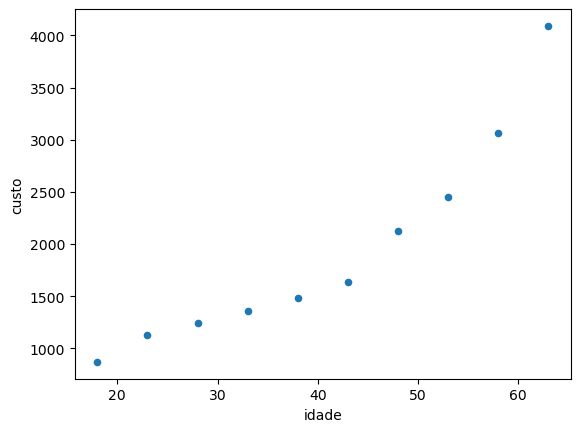

In [36]:
df.plot(x = 'idade', y='custo', kind='scatter')

#### Divisão de treino e teste

In [37]:
X = df[['idade']]
y = df['custo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

#### Construção do modelo

In [38]:
model = LinearRegression()
model

LinearRegression()

#### Treinamento do modelo

In [41]:
model.fit(X_train, y_train)

LinearRegression()

#### Predição

In [42]:
y_pred = model.predict(X_test)
y_pred

array([3040.18103448,  777.06896552])

#### Avaliação

In [43]:
y_pred

array([3040.18103448,  777.06896552])

In [44]:
y_test

8    3066
1    1132
Name: custo, dtype: int64

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mae

190.375

In [47]:
mse = mean_squared_error(y_test, y_pred)
mse

63321.32910969084

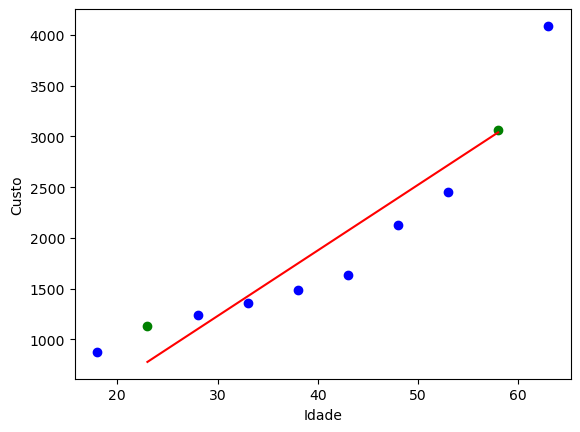

In [48]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.show()